## Experimental sequence example
Plot is loosely based on Kiefer et al. https://doi.org/10.48550/arXiv.2507.22112

ChatGPT was used to create an outline of the code, which was then heavily modified. 

## q2D contact spectroscopy sequence (with lattice loading)

## q2D contact spectroscopy sequence (w sweep)

## q2D contact spectroscopy sequence

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys, os

from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

from general.exp_sequence import *

In [5]:
# Define parameters
labels = ['rf', r'$B$']
units = ['arb.', 'G']
ylims = [[0, 12], [197, 212]]
colors = ["purple", "green"]

# Load df
df = pd.read_excel('sequences/q2d_rf_pulse_sequence.xlsx')

# Define function mappings that require parameters
seq_func_mapping['blackman1'] = blackman_seq_func(10)

# Replace NaNs and function names, and calculate y lists
x, y, x_edges, df = calculate_sequence(df, seq_func_mapping)

# Define segments 
x_centers = (x_edges[:-1] + x_edges[1:]) / 2

# Parameter list
parameters = list(zip(y, ylims, labels, colors))

# Fill empty label cells with ''
df['times'] = df['times'].fillna('')
df['segments'] = df['segments'].fillna('')

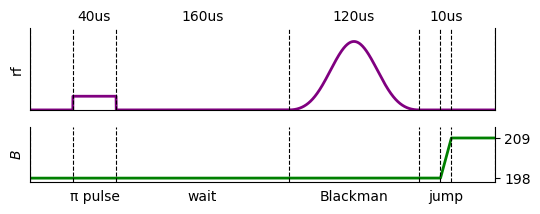

In [6]:
fig, axes = plt.subplots(len(parameters), 1, sharex=True, figsize=(6, 2),
                         gridspec_kw={'hspace': 0.25}, height_ratios=[1.5, 1])

# Plot each parameter
for ax, (y, ylims, label, color) in zip(axes, parameters):
    ax.plot(x, y, color=color, lw=2)
    ax.set(xlim=[0, max(x)], ylim=ylims, ylabel=label)
    ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)

# Vertical dashed lines for segment boundaries
for ax in axes:
    for s in x_edges:
        ax.axvline(s, color='k', linestyle='--', lw=0.8)

# Add duration and label annotations
for i, (name, duration) in enumerate(zip(df['segments'].values, df['times'].values)):
    axes[0].text(x_centers[i], 1.05, f"{duration}", ha='center',
                 va='bottom', transform=axes[0].get_xaxis_transform())
    axes[-1].text(x_centers[i], -0.15, name, ha='center',
                 va='top', transform=axes[-1].get_xaxis_transform(), fontsize=10)

axes[-1].set_xticklabels([])
axes[-1].set_xticks([])
# plt.tight_layout()

axes[0].set_yticklabels([])
axes[0].set_yticks([])

axes[1].yaxis.set_label_position("left")
axes[1].yaxis.tick_right()
axes[1].set_yticks([198, 209])
axes[1].set_yticklabels([198, 209])

plt.show()


In [7]:
fig.savefig("outputs/exp_sequence_q2d.pdf")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys, os

from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

from general.exp_sequence import *

In [ ]:
# Define parameters
labels = ['lattice depth', 'rf amplitude', 'magnetic field']
units = [r'$E_R$', 'arb.', 'G']
ylims = [[0, 60], [0, 12], [197, 210]]
colors = ["purple", "tomato", "green"]

# Load df
df = pd.read_excel('q2d_contact_sequence.xlsx')

# Define function mappings that require parameters
seq_func_mapping['sine1'] = sine_seq_func(1, 3)
seq_func_mapping['blackman1'] = blackman_seq_func(10)

# Define segments 
n_segments = len(df)
segment_edges = np.arange(n_segments + 1)  # Equal-width boundaries: 0, 1, 2, ...
segment_centers = (segment_edges[:-1] + segment_edges[1:]) / 2
delta = 0.001
x = np.linspace(0, n_segments - delta, 500)

# Replace NaNs and function names, and calculate y lists
ys, df = calculate_sequence(df, x, seq_func_mapping)
print(df)

# Parameter list
parameters = list(zip(ys, ylims, labels, colors))

        segments  times  param1_val  \
0   loading slow  200ms         5.0   
1   loading fast   20ms        40.0   
2            BM1   10ms        40.0   
3          AM/FM   10ms        40.0   
4            BM2   10ms        40.0   
5      set point   20ms        50.0   
6       pi pulse   40us        50.0   
7           wait  100us        50.0   
8       Blackman  120us        50.0   
9           jump   10us        50.0   
10       lat off   30ms         0.0   
11           SSI   10ms         0.0   

                                          param1_func  param2_val  \
0         <function linear_seq at 0x000001F2194037E0>         0.0   
1         <function linear_seq at 0x000001F2194037E0>         0.0   
2       <function constant_seq at 0x000001F22A413420>         0.0   
3   <function sine_seq_func.<locals>.sine_seq at 0...         0.0   
4       <function constant_seq at 0x000001F22A413420>         0.0   
5         <function linear_seq at 0x000001F2194037E0>         0.0   
6       <

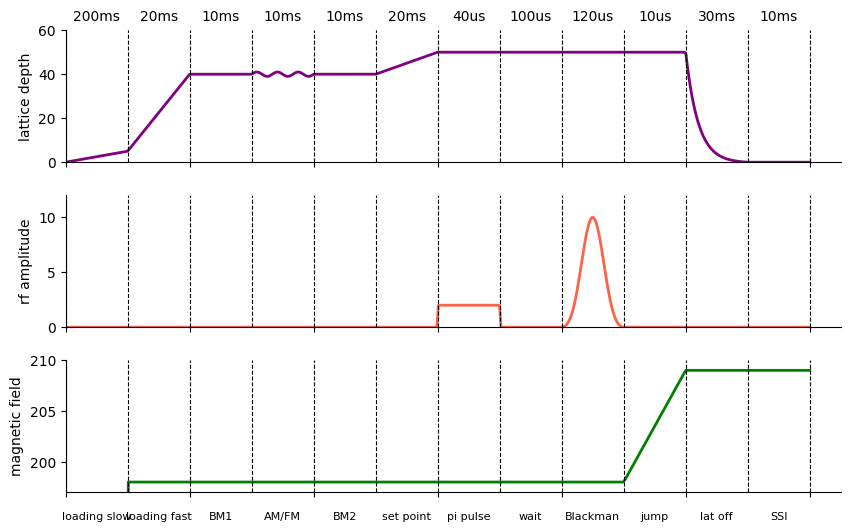

In [ ]:
fig, axes = plt.subplots(len(parameters), 1, sharex=True, figsize=(10, 6),
                         gridspec_kw={'hspace': 0.25})

# Plot each parameter
for ax, (y, ylims, label, color) in zip(axes, parameters):
    ax.plot(x, y, color=color, lw=2)
    ax.set(xlim=[0, max(x) + 0.5], ylim=ylims, ylabel=label)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Vertical dashed lines for segment boundaries
for ax in axes:
    for s in segment_edges:
        ax.axvline(s, color='k', linestyle='--', lw=0.8)

# Add duration and label annotations
for i, (name, duration) in enumerate(zip(df['segments'].values, df['times'].values)):
    axes[0].text(segment_centers[i], 1.05, f"{duration}", ha='center',
                 va='bottom', transform=axes[0].get_xaxis_transform())
    axes[-1].text(segment_centers[i], -0.15, name, ha='center',
                 va='top', transform=axes[-1].get_xaxis_transform(), fontsize=8)

axes[-1].set_xticklabels([])
# plt.tight_layout()
plt.show()


In [ ]:
fig.savefig("outputs/exp_sequence_q2d.pdf")

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys, os

from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

from general.exp_sequence import *

In [59]:
# Define parameters
labels = ['Rf amplitude', 'Magnetic field']
units = ['arb.', 'G']
ylims = [[0, 12], [197, 212]]
colors = ["purple", "green"]

# Load df
df = pd.read_excel('q2d_rf_sequence.xlsx')

# Define function mappings that require parameters
seq_func_mapping['blackman1'] = blackman_seq_func(10)

# Replace NaNs and function names, and calculate y lists
x, y, x_edges, df = calculate_sequence(df, seq_func_mapping)

# Define segments 
x_centers = (x_edges[:-1] + x_edges[1:]) / 2

# Parameter list
parameters = list(zip(y, ylims, labels, colors))

# Fill empty label cells with ''
df['times'] = df['times'].fillna('')
df['segments'] = df['segments'].fillna('')

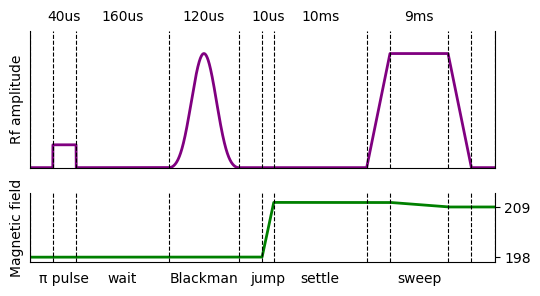

In [60]:
fig, axes = plt.subplots(len(parameters), 1, sharex=True, figsize=(6, 3),
                         gridspec_kw={'hspace': 0.25}, height_ratios=[2, 1])

# Plot each parameter
for ax, (y, ylims, label, color) in zip(axes, parameters):
    ax.plot(x, y, color=color, lw=2)
    ax.set(xlim=[0, max(x)], ylim=ylims, ylabel=label)
    ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)

# Vertical dashed lines for segment boundaries
for ax in axes:
    for s in x_edges:
        ax.axvline(s, color='k', linestyle='--', lw=0.8)

# Add duration and label annotations
for i, (name, duration) in enumerate(zip(df['segments'].values, df['times'].values)):
    axes[0].text(x_centers[i], 1.05, f"{duration}", ha='center',
                 va='bottom', transform=axes[0].get_xaxis_transform())
    axes[-1].text(x_centers[i], -0.15, name, ha='center',
                 va='top', transform=axes[-1].get_xaxis_transform(), fontsize=10)

axes[-1].set_xticklabels([])
axes[-1].set_xticks([])
# plt.tight_layout()

axes[0].set_yticklabels([])
axes[0].set_yticks([])

axes[1].yaxis.set_label_position("left")
axes[1].yaxis.tick_right()
axes[1].set_yticks([198, 209])
axes[1].set_yticklabels([198, 209])

plt.show()


In [53]:
fig.savefig("outputs/exp_sequence_q2d.pdf")

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys, os

from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

from general.exp_sequence import *

In [ ]:
# Define parameters
labels = ['lattice depth', 'rf amplitude', 'magnetic field']
units = [r'$E_R$', 'arb.', 'G']
ylims = [[0, 60], [0, 12], [197, 210]]
colors = ["purple", "tomato", "green"]

# Load df
df = pd.read_excel('q2d_contact_sequence.xlsx')

# Define function mappings that require parameters
seq_func_mapping['sine1'] = sine_seq_func(1, 3)
seq_func_mapping['blackman1'] = blackman_seq_func(10)

# Define segments 
n_segments = len(df)
segment_edges = np.arange(n_segments + 1)  # Equal-width boundaries: 0, 1, 2, ...
segment_centers = (segment_edges[:-1] + segment_edges[1:]) / 2
delta = 0.001
x = np.linspace(0, n_segments - delta, 500)

# Replace NaNs and function names, and calculate y lists
ys, df = calculate_sequence(df, x, seq_func_mapping)
print(df)

# Parameter list
parameters = list(zip(ys, ylims, labels, colors))

        segments  times  param1_val  \
0   loading slow  200ms         5.0   
1   loading fast   20ms        40.0   
2            BM1   10ms        40.0   
3          AM/FM   10ms        40.0   
4            BM2   10ms        40.0   
5      set point   20ms        50.0   
6       pi pulse   40us        50.0   
7           wait  100us        50.0   
8       Blackman  120us        50.0   
9           jump   10us        50.0   
10       lat off   30ms         0.0   
11           SSI   10ms         0.0   

                                          param1_func  param2_val  \
0         <function linear_seq at 0x000001F2194037E0>         0.0   
1         <function linear_seq at 0x000001F2194037E0>         0.0   
2       <function constant_seq at 0x000001F22A413420>         0.0   
3   <function sine_seq_func.<locals>.sine_seq at 0...         0.0   
4       <function constant_seq at 0x000001F22A413420>         0.0   
5         <function linear_seq at 0x000001F2194037E0>         0.0   
6       <

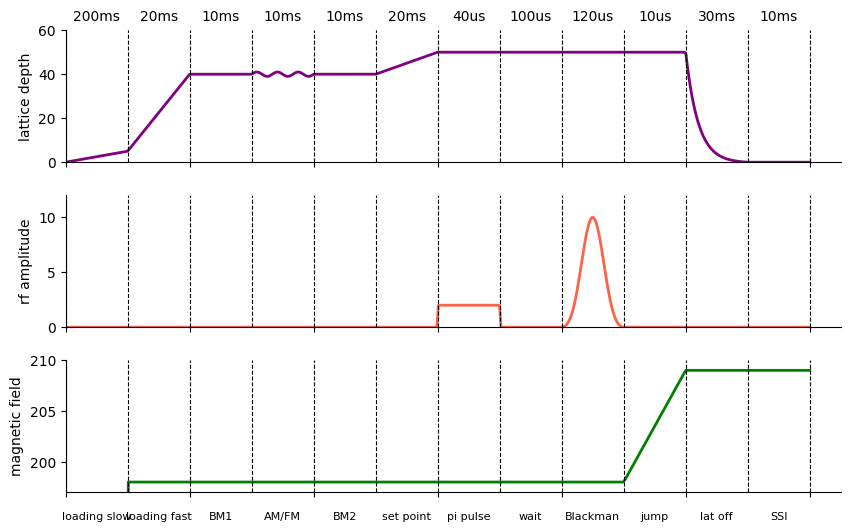

In [3]:
fig, axes = plt.subplots(len(parameters), 1, sharex=True, figsize=(10, 6),
                         gridspec_kw={'hspace': 0.25})

# Plot each parameter
for ax, (y, ylims, label, color) in zip(axes, parameters):
    ax.plot(x, y, color=color, lw=2)
    ax.set(xlim=[0, max(x) + 0.5], ylim=ylims, ylabel=label)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Vertical dashed lines for segment boundaries
for ax in axes:
    for s in segment_edges:
        ax.axvline(s, color='k', linestyle='--', lw=0.8)

# Add duration and label annotations
for i, (name, duration) in enumerate(zip(df['segments'].values, df['times'].values)):
    axes[0].text(segment_centers[i], 1.05, f"{duration}", ha='center',
                 va='bottom', transform=axes[0].get_xaxis_transform())
    axes[-1].text(segment_centers[i], -0.15, name, ha='center',
                 va='top', transform=axes[-1].get_xaxis_transform(), fontsize=8)

axes[-1].set_xticklabels([])
# plt.tight_layout()
plt.show()


In [ ]:
fig.savefig("outputs/exp_sequence_q2d.pdf")